In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pymysql
import pyodbc

In [3]:
# Load .env variables
from dotenv import load_dotenv
print(load_dotenv())

True


In [4]:
# Create MySQL connection (AWS RDS)
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASS')}@{os.getenv('MYSQL_HOST')}/{os.getenv('MYSQL_DB')}"
)

# Create MSSQL connection
mssql_engine = create_engine(
    f"mssql+pyodbc://{os.getenv('MSSQL_USER')}:{os.getenv('MSSQL_PASS')}@{os.getenv('MSSQL_HOST')}/{os.getenv('MSSQL_DB')}?driver={os.getenv('MSSQL_DRIVER')}&Encrypt=yes&TrustServerCertificate=no"
)

In [5]:
# Read from AWS MySQL
df = pd.read_sql("SELECT * FROM gurgaon_properties_cleaned_v2", con=mysql_engine)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,...,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,...,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,...,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [6]:
df.shape

(3679, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3679 non-null   object 
 1   society              3193 non-null   object 
 2   sector               3679 non-null   object 
 3   price                3663 non-null   float64
 4   price_per_sqft       3663 non-null   float64
 5   area                 3663 non-null   float64
 6   areaWithType         3679 non-null   object 
 7   bedRoom              3679 non-null   int64  
 8   bathroom             3679 non-null   int64  
 9   balcony              3679 non-null   object 
 10  floorNum             3662 non-null   object 
 11  facing               3679 non-null   object 
 12  agePossession        3679 non-null   object 
 13  super_built_up_area  1877 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1874 non-null   f

In [8]:
df.duplicated().sum()

np.int64(4)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,...,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,...,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,...,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [11]:
df.shape

(3675, 23)

### property_type

<Axes: xlabel='property_type'>

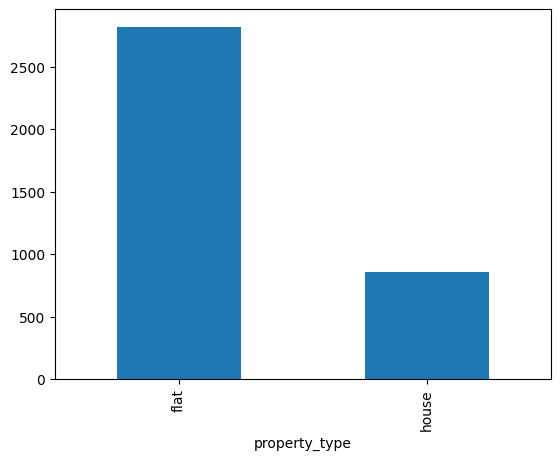

In [12]:
df['property_type'].value_counts().plot(kind='bar',)

Observations
- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [13]:
df['society'].value_counts().shape

(726,)

In [14]:
# check for missing values in 'society' column
df['society'].isnull().sum()

np.int64(486)

In [15]:
# Fill missing values in 'society' with 'independent' as there is no name of society
df['society'] = df['society'].fillna('independent')

In [16]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
shapoorji pallonji joyville gurugram       42
dlf new town heights                       38
                                         ... 
shree kirpalu gi sector 52                  1
denso haryana housing society               1
ace palm floors                             1
supertech basera                            1
m m residency, krishna colony, gurgaon      1
Name: count, Length: 727, dtype: int64

In [17]:
# Filter out 'independent' society and calculate cumulative distribution and select top 75 societies
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023518
ss the leaf                             0.046410
shapoorji pallonji joyville gurugram    0.059580
dlf new town heights                    0.071496
shree vardhman victoria                 0.082157
                                          ...   
the close north                         0.484478
dlf the primus                          0.488554
umang winter hills                      0.492631
Unitech Uniworld Resorts                0.496394
mvn athens                              0.500157
Name: proportion, Length: 75, dtype: float64

### 
Observation
- Out of 726 total societies, 50% of flats belong to the top 75 societies.  
- This indicates that a small number of societies account for a large portion of the listings.

In [18]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(274),
 'Very Low (1)': np.int64(358)}

<Axes: xlabel='society'>

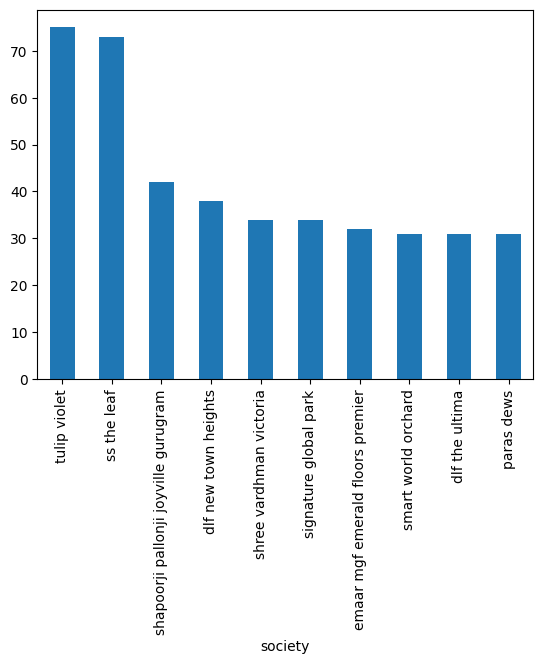

In [19]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

Observations
- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 274 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 358 societies, have only 1 listing.

## sector

In [20]:
# unique sectors
df['sector'].value_counts().shape

(115,)

<Axes: xlabel='sector'>

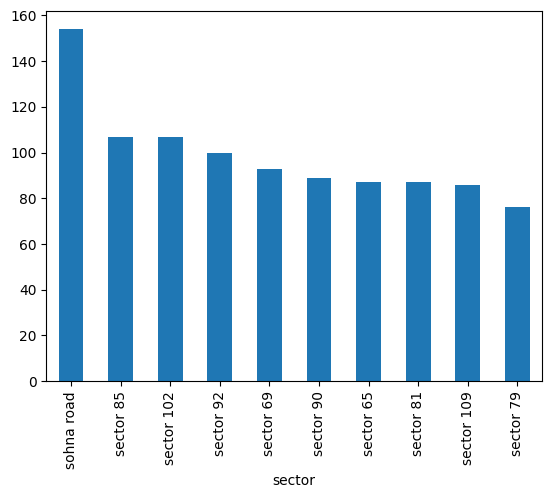

In [21]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [22]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(62),
 'Low (2-9)': np.int64(24),
 'Very Low (1)': np.int64(1)}

### Observations
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 62 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 24 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are 1 sector with only 1 listing.


### Price

In [23]:
df['price'].isnull().sum()

np.int64(16)

In [24]:
df['price'].describe()

count    3659.000000
mean        2.534157
std         2.980877
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

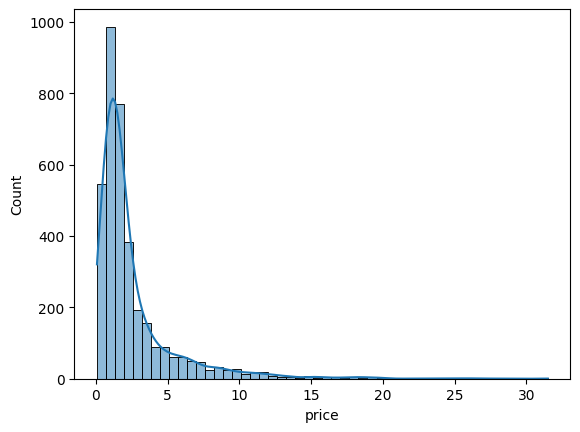

In [25]:
sns.histplot(df['price'], kde=True, bins=50)

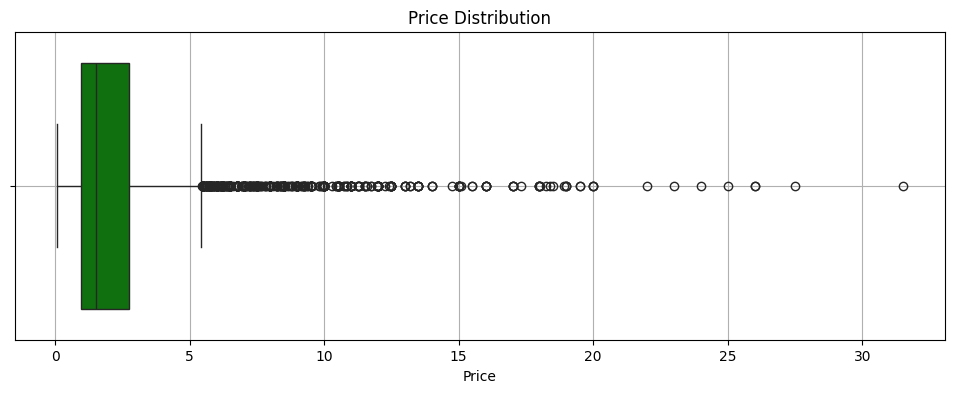

In [26]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['price'], color='green')
plt.grid()
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [27]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.278797986822502 14.929955531610577


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [28]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.268
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [29]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [30]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [31]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [32]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

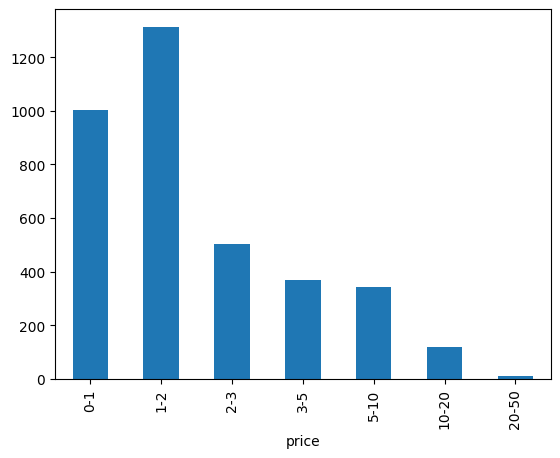

In [33]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

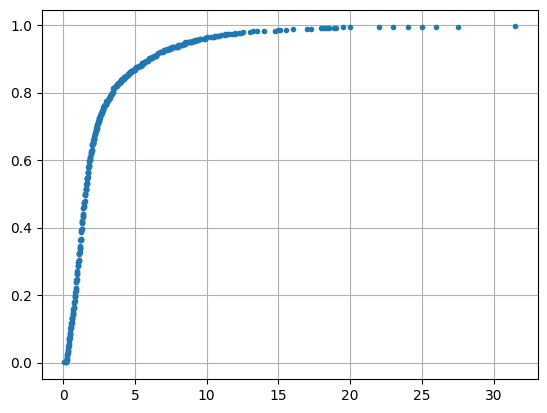

In [34]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

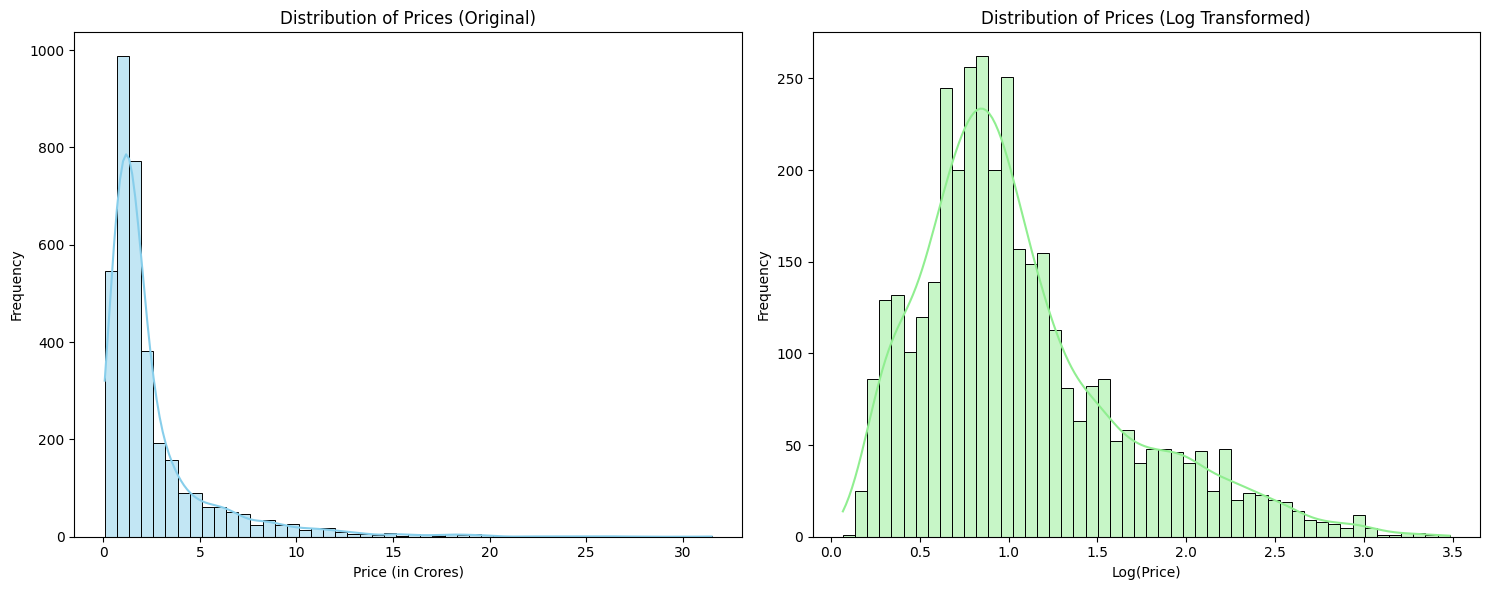

In [35]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [36]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0738304407396535 0.9642054730089265


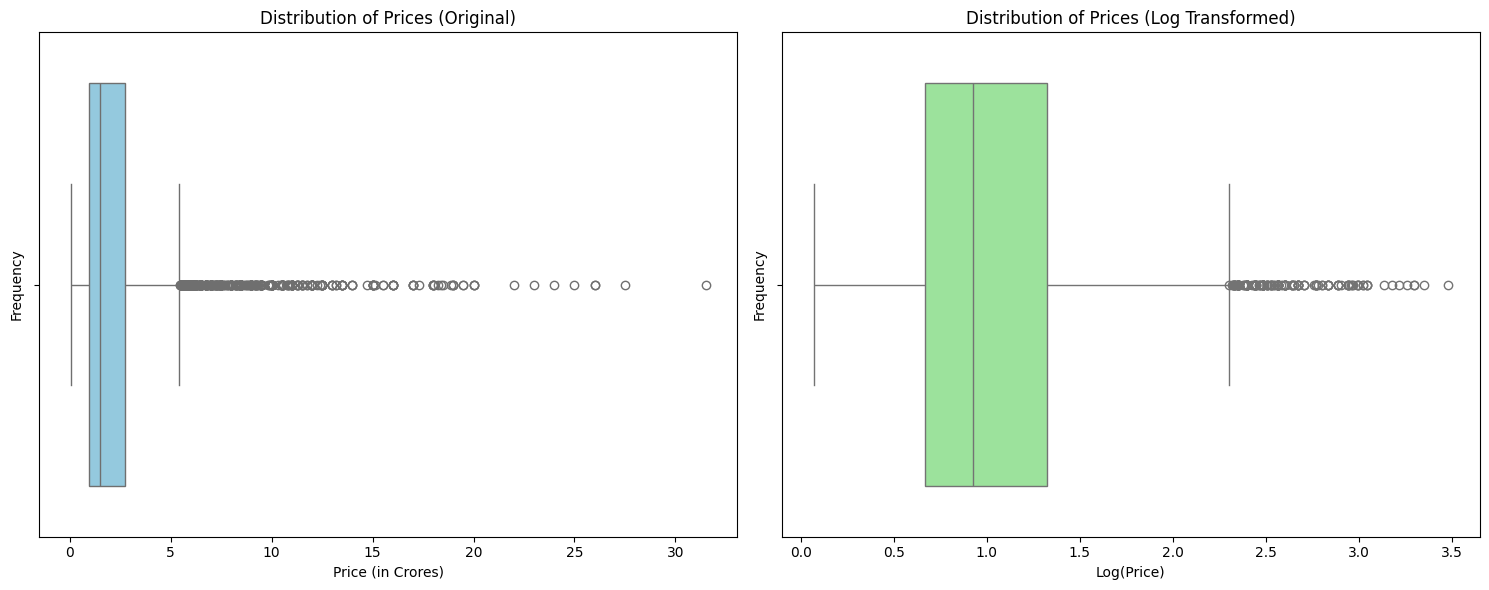

In [48]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x = df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x =np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [39]:
df['price_per_sqft'].isnull().sum()

np.int64(16)

In [40]:
df['price_per_sqft'].describe()

count      3659.000000
mean      13896.208527
std       23212.420099
min           4.000000
25%        6818.500000
50%        9020.000000
75%       13883.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

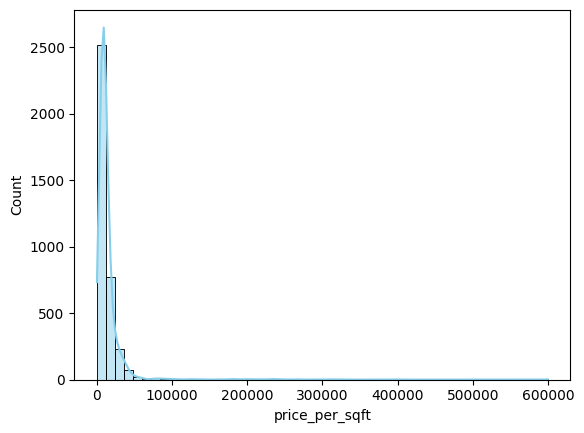

In [41]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

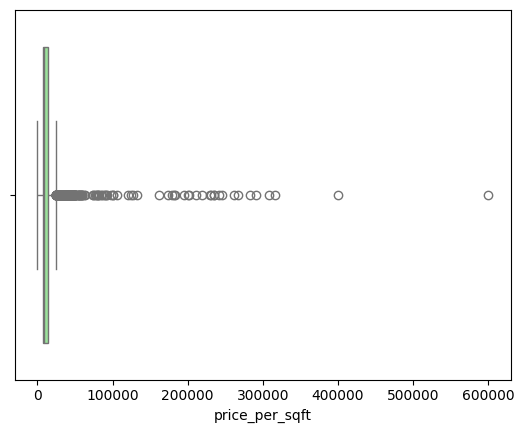

In [50]:

sns.boxplot(x=df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers


#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [52]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

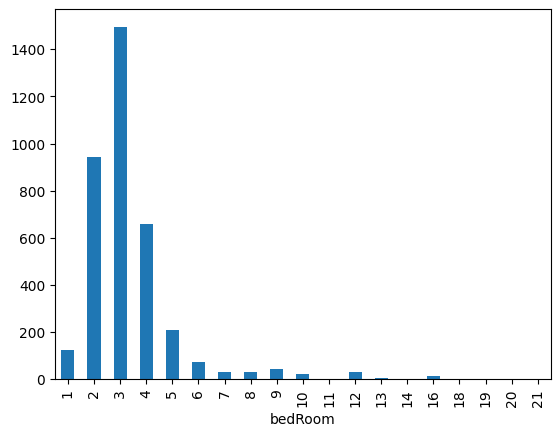

In [53]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

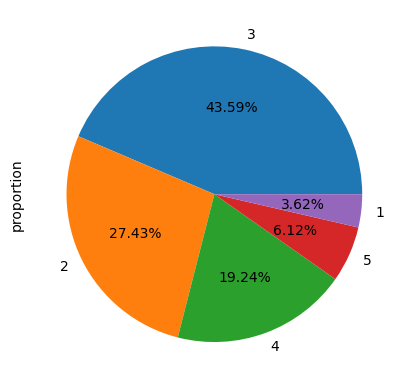

In [54]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [56]:
df['bathroom'].isnull().sum()


np.int64(0)

<Axes: xlabel='bathroom'>

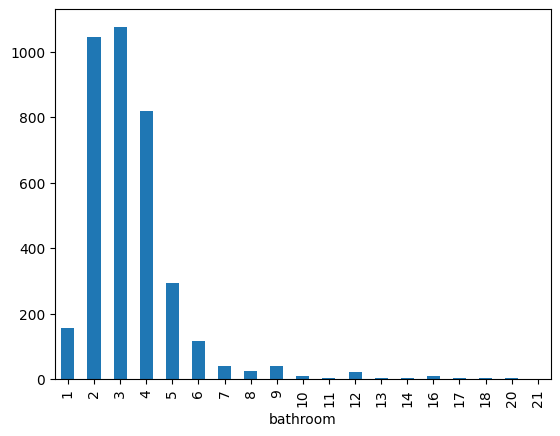

In [57]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

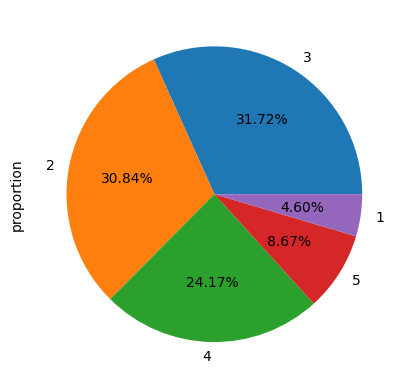

In [58]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


In [59]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,...,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,...,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,...,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,2,49


### balcony

In [61]:
df['balcony'].isnull().sum()

np.int64(0)

<Axes: xlabel='balcony'>

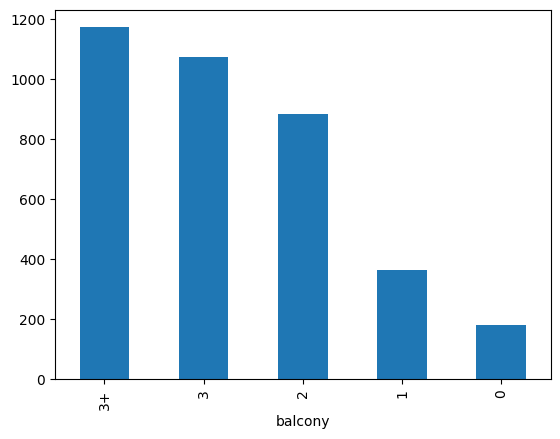

In [62]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

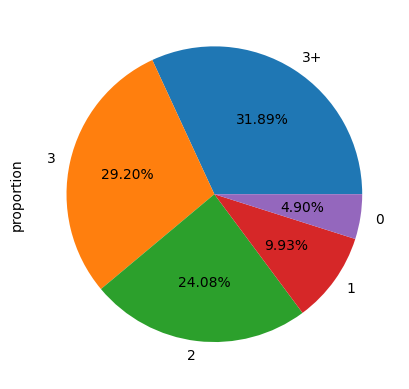

In [63]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum

In [65]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19
1,7,NA,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65
2,None,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [66]:
df['floorNum'].isnull().sum()

np.int64(17)

In [72]:
# fill missing values in 'floorNum' with 0 and convert to integer
df['floorNum'] = df['floorNum'].fillna(0).astype(int)

In [73]:
df['floorNum'].describe()

count    3675.000000
mean        6.764082
std         6.016591
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

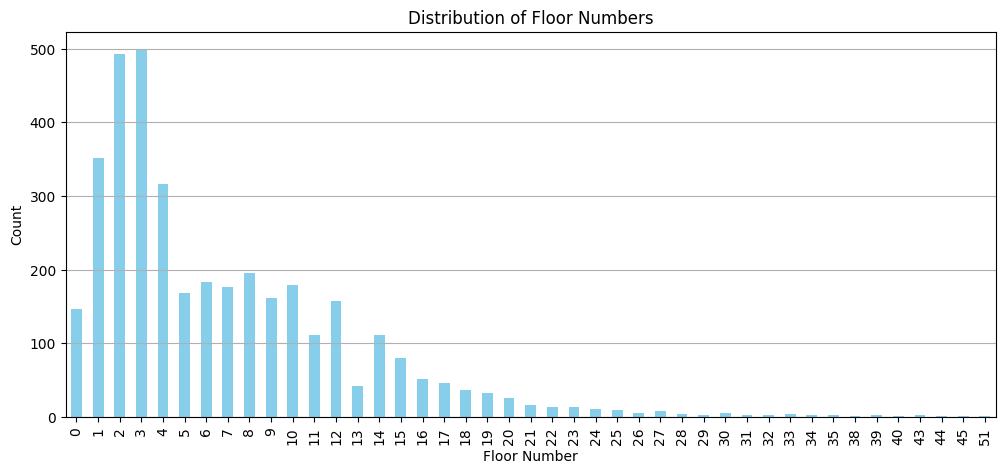

In [77]:
# df['floorNum'].value_counts().sort_index().plot(kind='bar')
plt.figure(figsize=(12, 5))  # Width = 12, Height = 5 (adjust as needed)
df['floorNum'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Floor Numbers')
plt.xlabel('Floor Number')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

<Axes: xlabel='floorNum'>

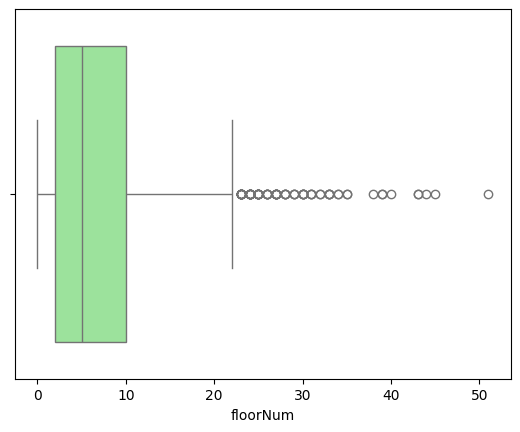

In [79]:
sns.boxplot(x = df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [81]:
df['facing'].isnull().sum()

np.int64(0)

In [82]:
df['facing'].value_counts()

facing
NA            1043
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [84]:
df['agePossession'].isnull().sum()

np.int64(0)

In [85]:
df['agePossession'].value_counts()


agePossession
Relatively New        1646
New Property           705
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     152
Name: count, dtype: int64

### areas

In [86]:
# super built up area
df['super_built_up_area'].isnull().sum()

np.int64(1799)

In [88]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.780144
std        764.225294
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

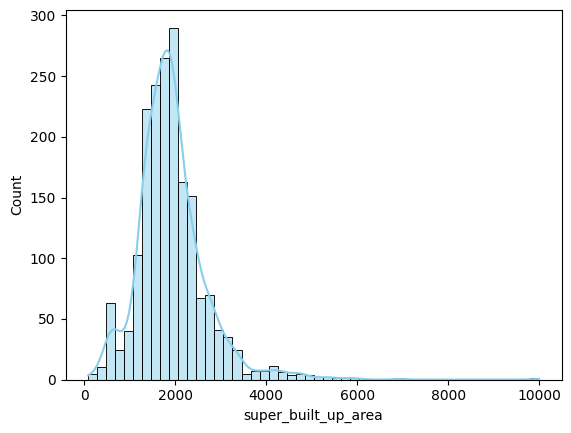

In [89]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

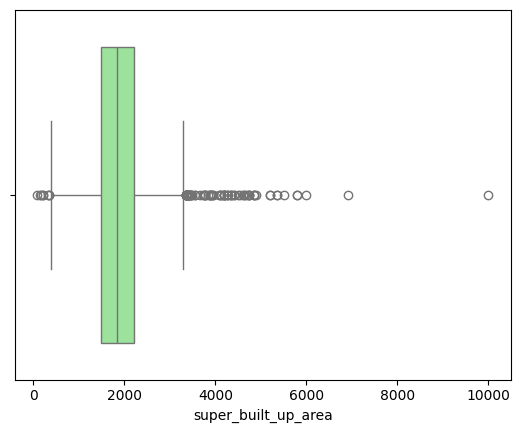

In [91]:
sns.boxplot(x = df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [92]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(1987)

In [93]:
df['built_up_area'].describe()

count      1688.000000
mean       2380.401084
std       17953.497259
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

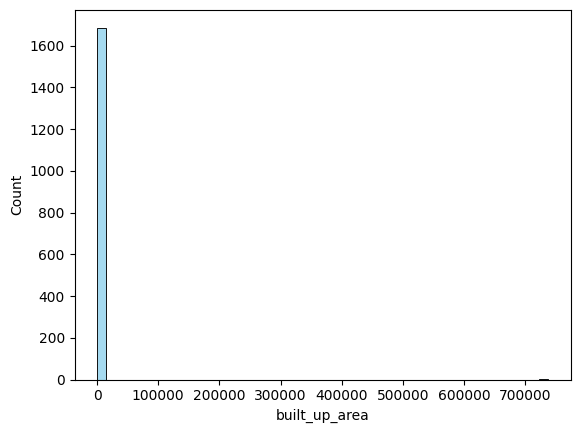

In [94]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

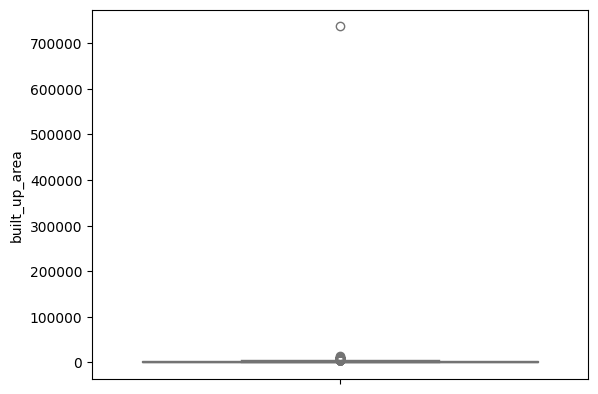

In [95]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [96]:
# carpet area
df['carpet_area'].isnull().sum()

np.int64(1803)

In [97]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179956
std       22799.836411
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

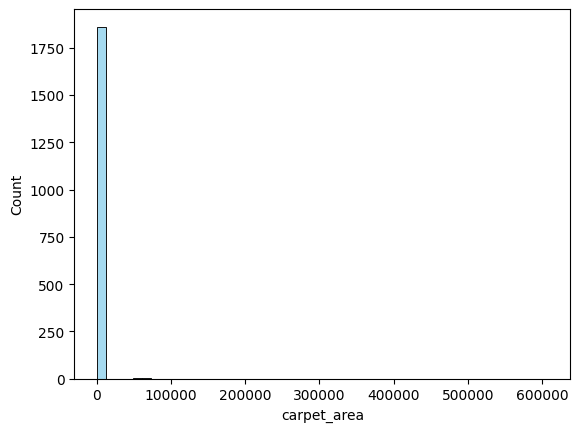

In [98]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

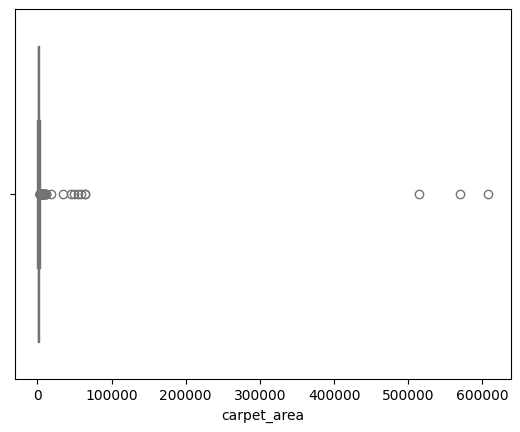

In [100]:
sns.boxplot(x =df['carpet_area'].dropna(), color='lightgreen')


In [101]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,1,1,0,19
1,0,0,0,0,0,0,65
2,0,1,0,1,0,2,130
3,0,1,0,0,1,2,49
4,0,1,0,0,0,2,49
...,...,...,...,...,...,...,...
3674,0,0,0,0,0,0,23
3675,0,0,0,0,0,0,23
3676,0,0,0,0,1,0,49
3677,0,0,0,0,0,0,0


### additional rooms

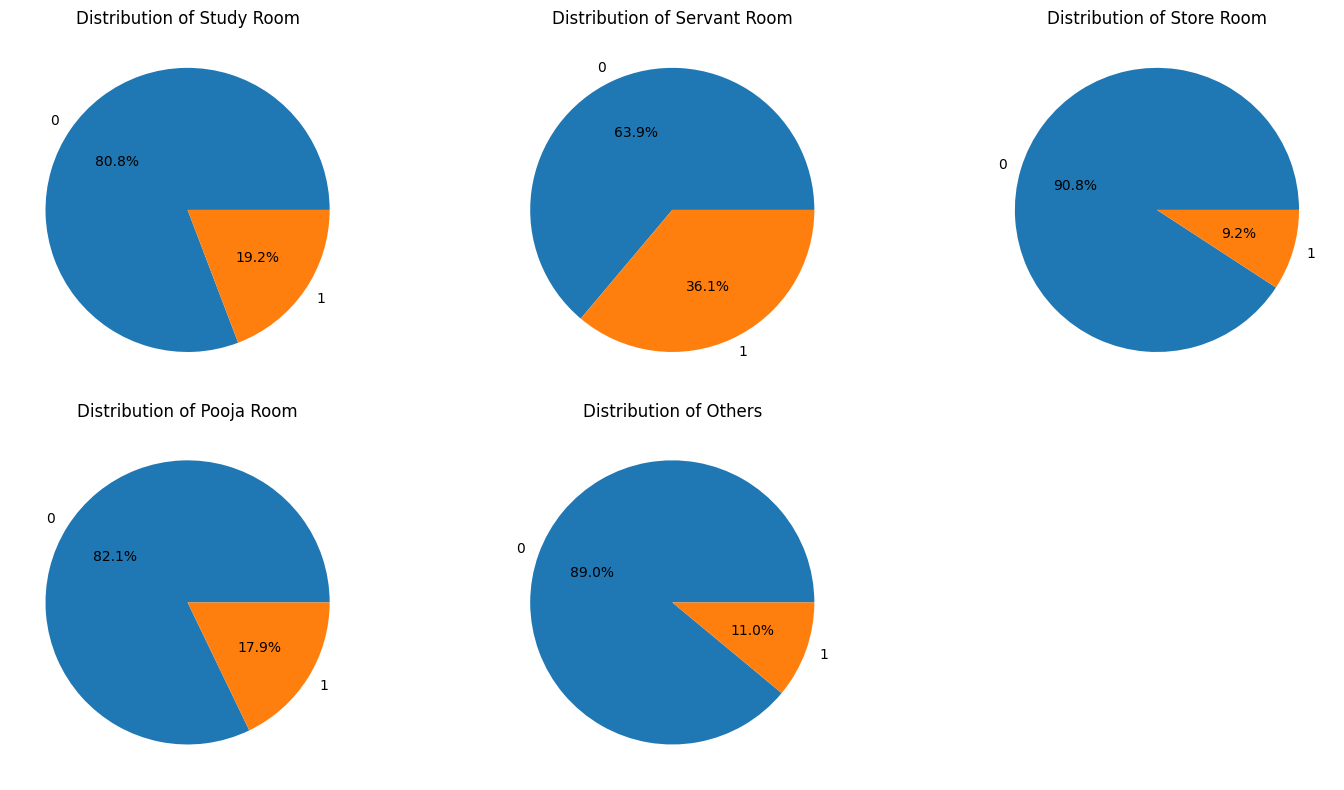

In [ ]:
plt.figure(figsize=(15, 8))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx) # 2, 3 is the plot grid where idx will be placed number of charts
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax) # startangle=90 all charts will be close to 90 position and autopct='%1.1f%%' show % at 1 decimal place
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [107]:
df['furnishing_type'].value_counts()

furnishing_type
0    2434
2    1038
1     203
Name: count, dtype: int64

<Axes: ylabel='count'>

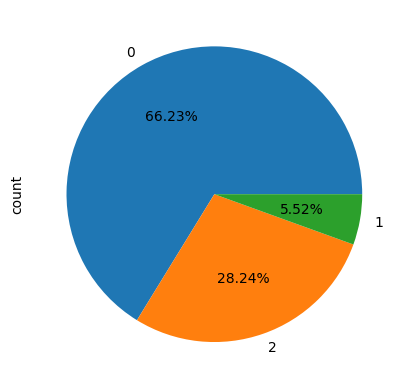

In [108]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [109]:
df['luxury_score'].isnull().sum()


np.int64(0)

In [110]:
df['luxury_score'].describe()

count    3675.000000
mean       71.333878
std        53.234609
min         0.000000
25%        31.000000
50%        58.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

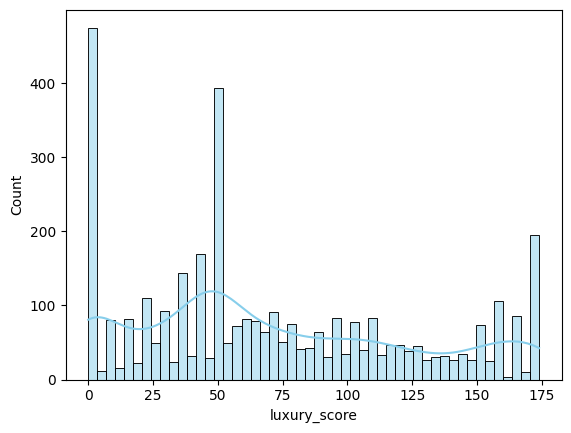

In [111]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

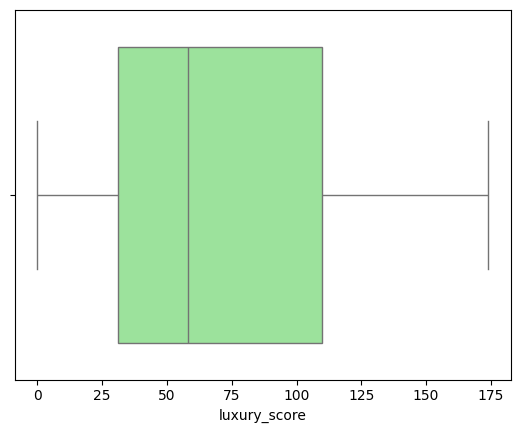

In [112]:
sns.boxplot(x = df['luxury_score'], color='lightgreen')


The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [113]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,...,NaN,783.0,NaN,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,...,NaN,NaN,763.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,...,NaN,2800.0,2200.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,...,1950.0,NaN,1161.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,2,49


In [114]:
df.shape

(3675, 23)

In [115]:
df.to_sql('gurgaon_properties_cleaned_v2', con=mysql_engine, if_exists='replace', index=False)

3675

In [118]:
df.to_sql('gurgaon_properties_cleaned_v2', con=mssql_engine, if_exists='replace', index=False)

35